# Непараметрические гипотезы
---
# Терапия при анорексии

В исследовании оценивается эффективность поведенческой терапии для лечения анорексии. Для 50 пациентов известен вес до начала терапии и по её окончании. Была ли терапия эффективной?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

RANDOM_SEED = 1234
np.random.seed(RANDOM_SEED)

In [2]:
w = pd.read_table("weight.txt")

In [3]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

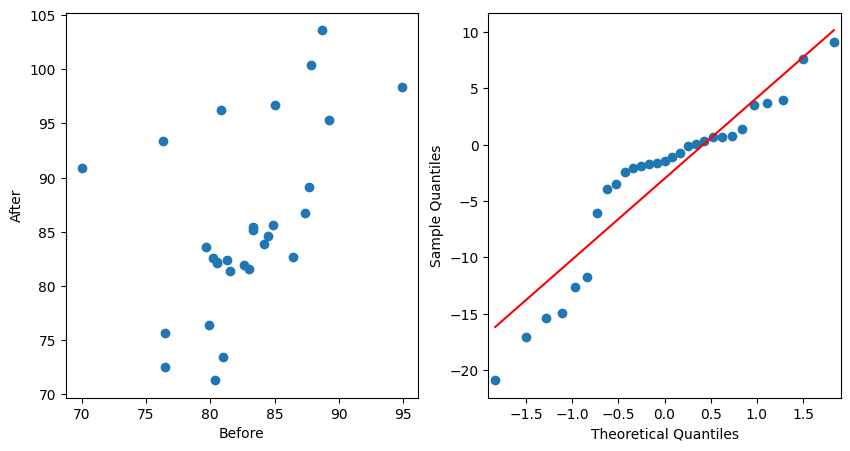

In [4]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
ax1.scatter(w['Before'], w['After'])
ax1.set(xlabel='Before', ylabel='After')
sm.qqplot(w['Before'] - w['After'], line ='s', ax=ax2)
plt.show()

1. Воспользуйтесь критериями знаков (`sign_test` из библиотеки `statsmodels`), критерием Уилкоксона (`wilcoxon` из библиотеки `scipy`). Не забудьте, что мы работаем со связанными выборками!

In [5]:
from statsmodels.stats.descriptivestats import sign_test
from scipy.stats import wilcoxon

print(f"Sign test: {sign_test(w['Before'], w['After'])}")
print(f"Wilcoxon test: {wilcoxon(w['Before'], w['After'])}")

Sign test: (-3.5, 0.26493089646101)
Wilcoxon test: WilcoxonResult(statistic=131.5, pvalue=0.0622917003929615)


2. C помощью бутстрэпа из 5000 повторений постройте доверительный интервал на медиану разницы веса до и после лечения. (в двух вариантах: с помощью `np.random.choice` и с помощью метода `bootstrap` из библиотеки `bootstrapped`)

In [6]:
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

/opt/hostedtoolcache/Python/3.11.5/x64/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/hostedtoolcache/Python/3.11.5/x64/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


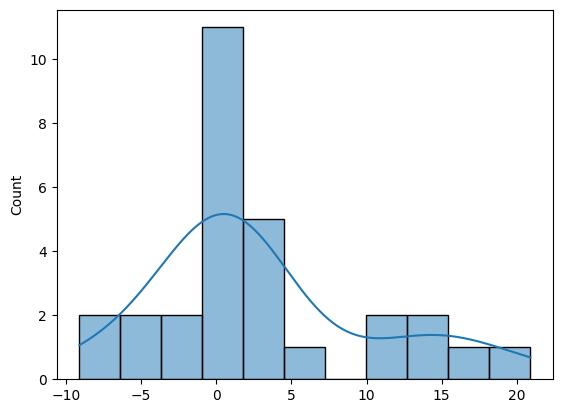

In [7]:
samples = np.array(w["After"] - w["Before"])
sns.histplot(samples, kde=True)
plt.show()

/opt/hostedtoolcache/Python/3.11.5/x64/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/hostedtoolcache/Python/3.11.5/x64/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


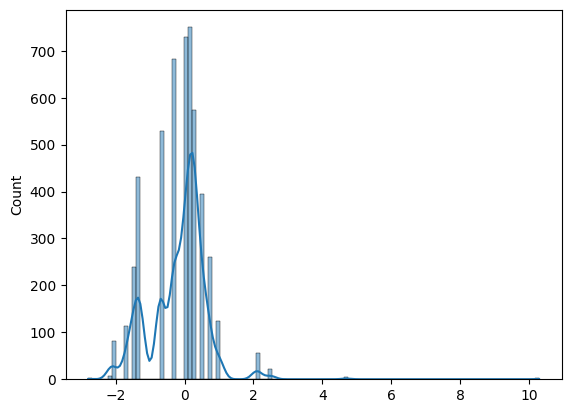

(0.3999999999999915, 3.09999999999998)

In [8]:
alpha = 0.05
n_bootstrap = 5000

boot = np.median(np.random.choice(samples, size=(n_bootstrap, len(samples))), axis=1) - np.median(samples)
sns.histplot(boot, kde=True)
plt.show()

np.median(samples) - np.percentile(boot, (1 - alpha / 2) * 100),  np.median(samples) - np.percentile(boot, alpha / 2 * 100)

In [9]:
bs.bootstrap(samples, stat_func=bs_stats.median, alpha=alpha, num_iterations=n_bootstrap)

1.3999999999999915    (0.3999999999999915, 3.09999999999998)

# Недвижимость в Сиэттле

Имеются данные о продажной стоимости недвижимости в Сиэтле для 50 сделок в 2001 году и 50 в 2002.
Изменились ли цены?

In [10]:
data = pd.read_table("seattle.txt")
x1 = data[data["Year"] == 2001]["Price"]
x2 = data[data["Year"] == 2002]["Price"]

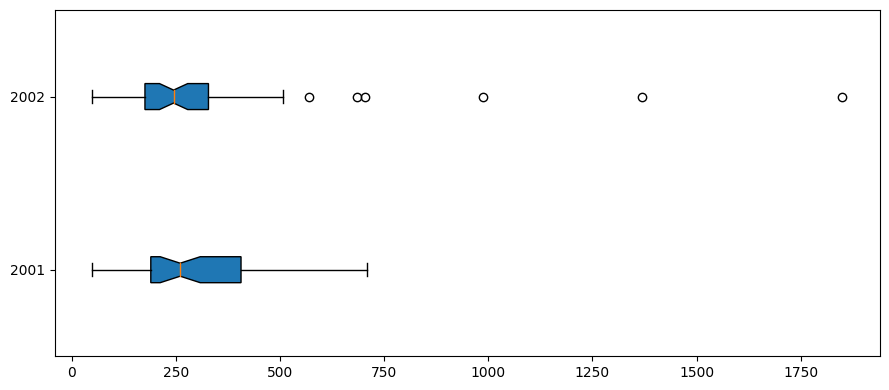

In [11]:
plt.figure(figsize=(9,4))
plt.boxplot([x1, x2], patch_artist=True, notch=True,
                vert=0, labels=['2001', '2002'])
plt.tight_layout()
plt.show()

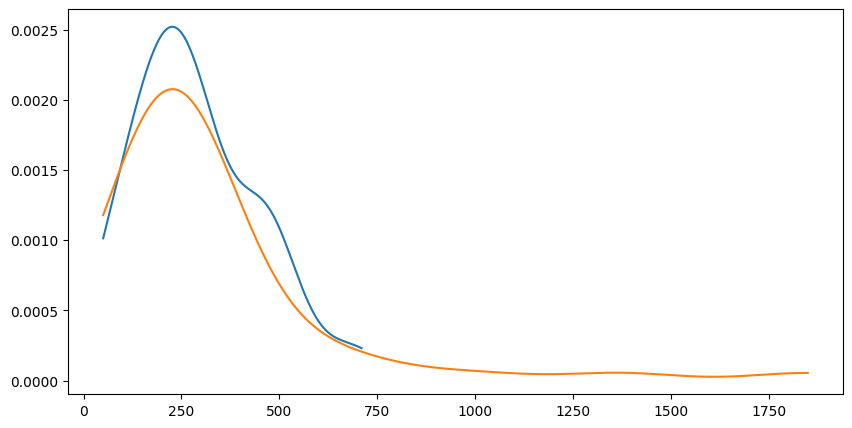

In [12]:
plt.figure(figsize=(10,5))
from scipy.stats import gaussian_kde
density_x1 = gaussian_kde(x1)
density_x2 = gaussian_kde(x2)
x_1 = np.linspace(min(x1), max(x1), 300)
plt.plot(x_1, density_x1(x_1))
x_2 = np.linspace(min(x2), max(x2), 300)
plt.plot(x_2, density_x2(x_2))
plt.show()

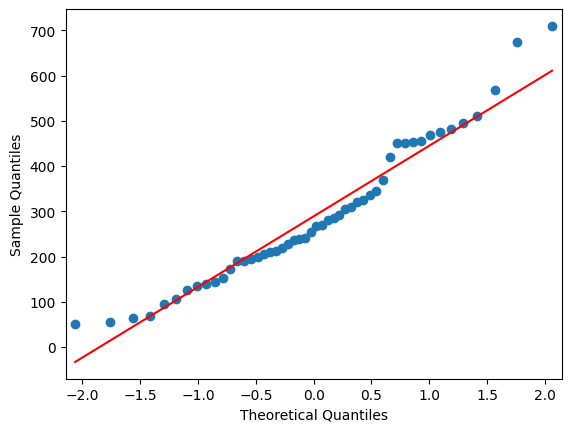

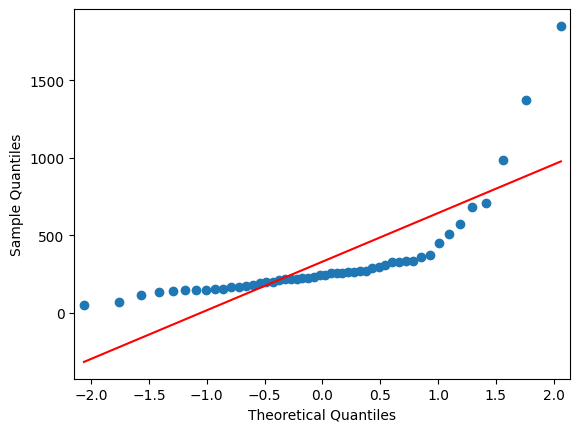

In [13]:
sm.qqplot(x1, line ='s')
sm.qqplot(x2, line ='s')
plt.show()

1. Вопсользуйтесь критерием Стьюдента и Манна-Уитни-Уилкоксона (`mannwhitneyu`).

Критерий Манна-Уитни-Уилкоксона:

In [14]:
from scipy.stats import mannwhitneyu
# Your Code Here

Критерий Стьюдента

In [15]:
from scipy.stats import ttest_ind
# Your Code Here

2. Постройте доверительные интервалы для средних значений в обеих выборках, а также доверительный интервал для разницы средних по обеим выборкам.